## EDA For Var 9-16

In [1]:
## Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import zipfile

In [2]:
## Read in the data
archive = zipfile.ZipFile('../02_Data/hotel_bookings.csv.zip', 'r')
files = archive.namelist()
with archive.open(files[0]) as csvfile:   
    ht = pd.read_csv(csvfile)

## Load the file
mine = ht.iloc[:,[1,8,9,10,11,12,13,14,15]]

In [5]:
## Simple descriptive info/stats
ht.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


[Text(0.5, 1.0, 'Correlation between features')]

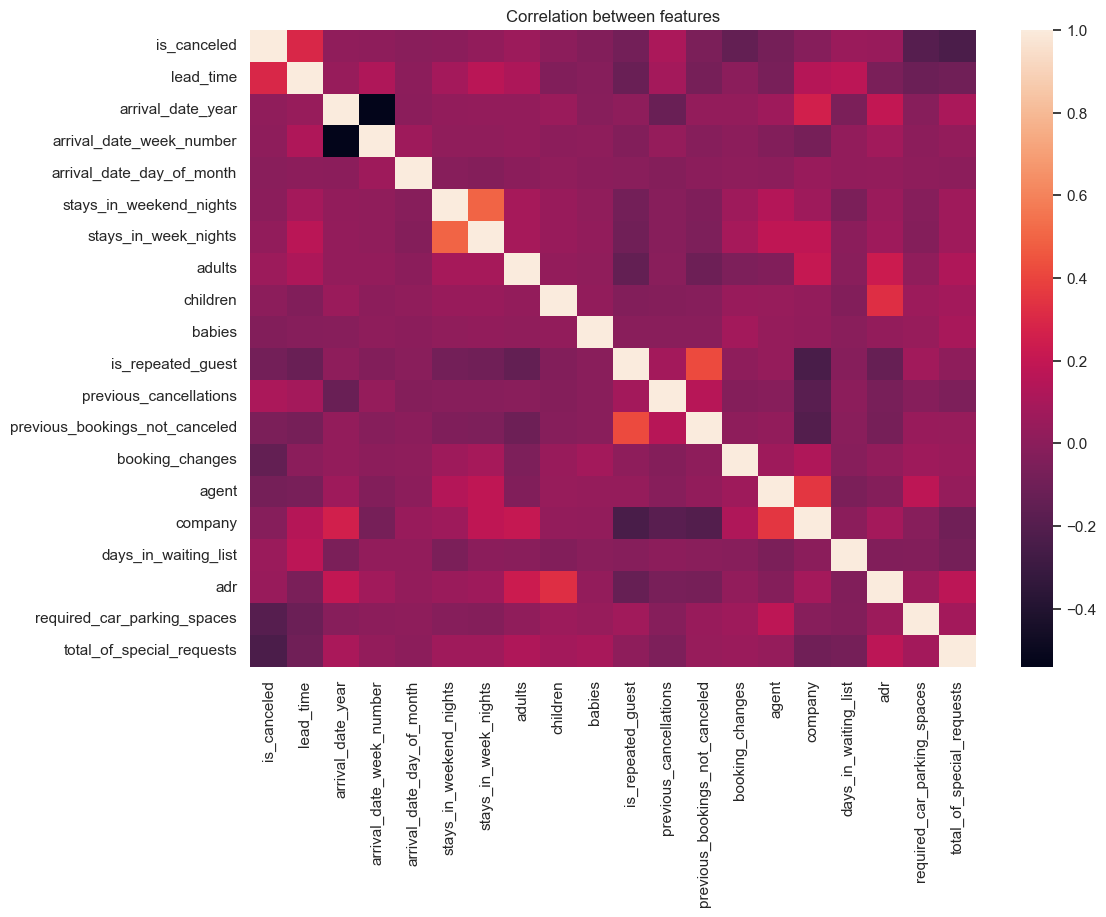

In [16]:
# Correlation plot 
sns.diverging_palette(220, 20, as_cmap=True)
corr = ht.corr()
sns.set(rc = {'figure.figsize':(11.7, 8.27)})
sns.heatmap(corr).set(title="Correlation between features")

In [8]:
pd.DataFrame(ht.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

""


In [56]:
## Checking data types row counts
mine.info()

## Looking like there are some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   is_canceled           119390 non-null  int64  
 1   stays_in_week_nights  119390 non-null  int64  
 2   adults                119390 non-null  int64  
 3   children              119386 non-null  float64
 4   babies                119390 non-null  int64  
 5   meal                  119390 non-null  object 
 6   country               118902 non-null  object 
 7   market_segment        119390 non-null  object 
 8   distribution_channel  119390 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 8.2+ MB


In [9]:
## Checking how many nan's are there
ht.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [58]:
# Calculating proportion of rows with missing values
mine.isnull().sum().sum()/mine.shape[0]

mine2 = mine.dropna() # remove 2 if we decide to drop na

Suggestion 1: drop na values with missing countries and missing children rows, which account for less than half percent of the data

In [59]:
mine2.describe()
## Some of the max values seem very very large. Indicating we might have some outliers.

,is_canceled,stays_in_week_nights,adults,children,babies
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,2.502145,1.858391,0.104207,0.007948
std,0.483168,1.900168,0.578576,0.399172,0.097380
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,2.000000,2.000000,0.000000,0.000000
75%,1.000000,3.000000,2.000000,0.000000,0.000000
max,1.000000,41.000000,55.000000,10.000000,10.000000


In [11]:
num = ht.describe().columns # column names of numerical columns
print(num)

cat = ht.columns.difference(num) # column names of categorical columns
print(cat)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Index(['arrival_date_month', 'assigned_room_type', 'country', 'customer_type',
       'deposit_type', 'distribution_channel', 'hotel', 'market_segment',
       'meal', 'reservation_status', 'reservation_status_date',
       'reserved_room_type'],
      dtype='object')


In [12]:
# For each column, checking the unique values

ht.loc[:,cat].nunique()

arrival_date_month          12
assigned_room_type          12
country                    177
customer_type                4
deposit_type                 3
distribution_channel         5
hotel                        2
market_segment               8
meal                         5
reservation_status           3
reservation_status_date    926
reserved_room_type          10
dtype: int64

<Figure size 640x480 with 0 Axes>

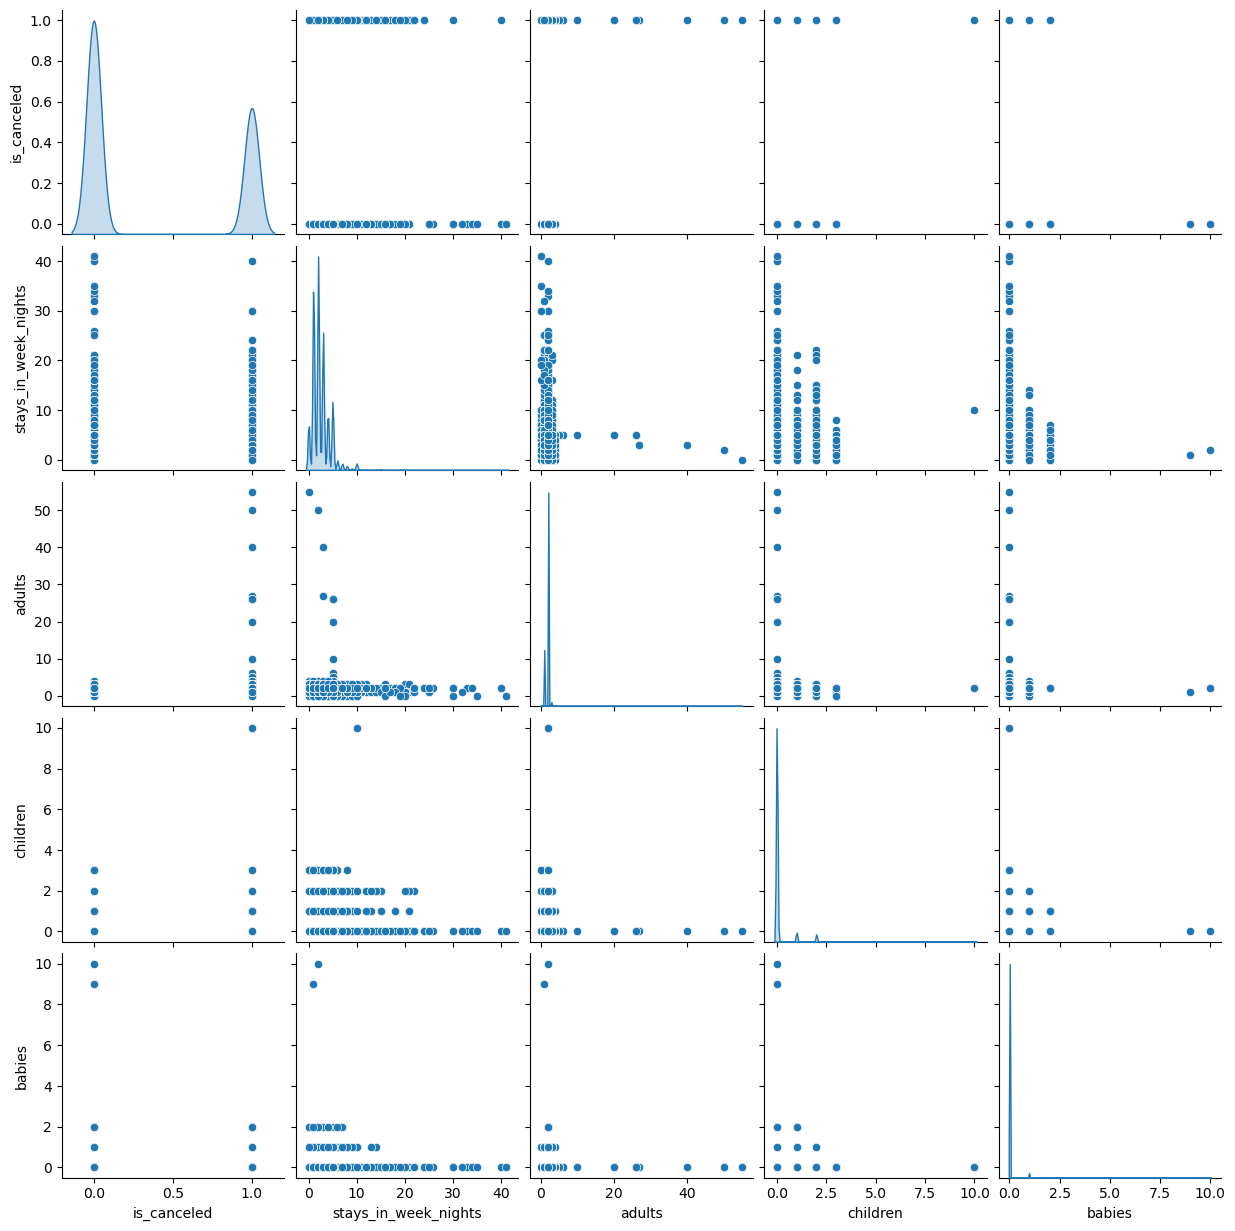

In [64]:
# Take a look at the distribution and correlations
plt.clf()
sns.pairplot(mine2,diag_kind = "kde")
plt.show()

## Seems like all these variables have some outliers

The data seems quite right skewed. Could take log of everything or remove the extreme outliers.

In [65]:
print(mine.quantile(0.95))
print(mine.quantile(0.99))

is_canceled             1.0
stays_in_week_nights    5.0
adults                  3.0
children                1.0
babies                  0.0
Name: 0.95, dtype: float64
is_canceled              1.0
stays_in_week_nights    10.0
adults                   3.0
children                 2.0
babies                   0.0
Name: 0.99, dtype: float64


<Figure size 640x480 with 0 Axes>

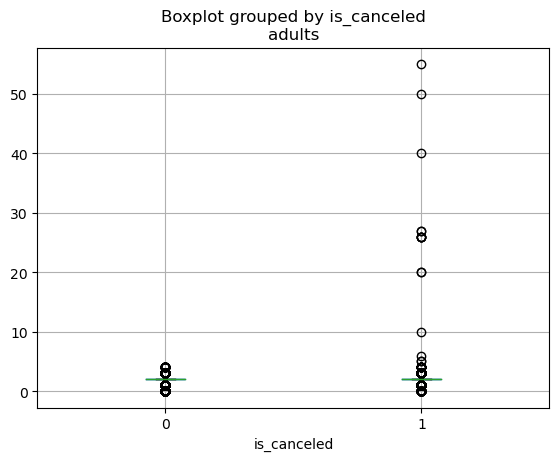

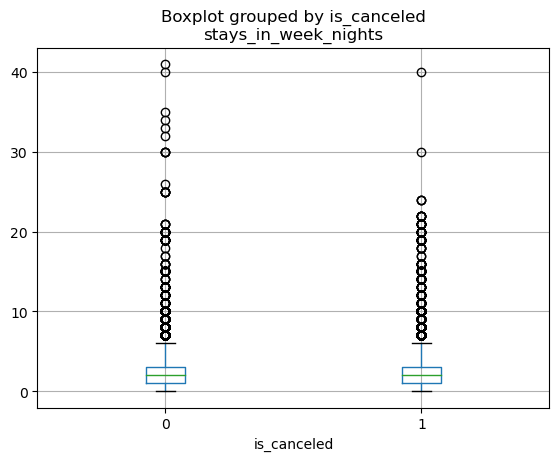

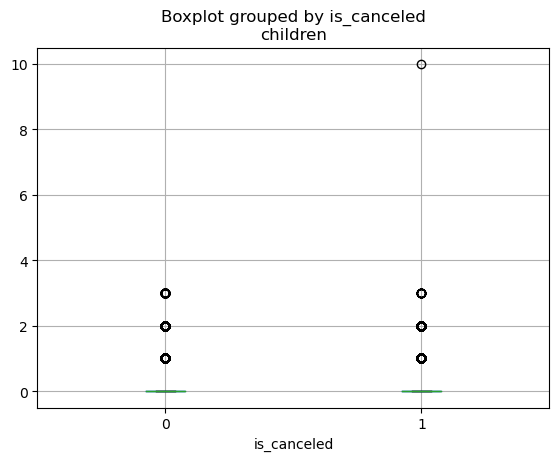

In [71]:
# Checking if distribution of the numeric values are different across canceled and not-canceled bookings

plt.clf()
mine2.boxplot(column = 'adults', by = 'is_canceled')
mine2.boxplot(column = 'stays_in_week_nights', by = 'is_canceled')
mine2.boxplot(column = 'children', by = 'is_canceled')

plt.show()

# Seems like almost all of the very large bookings (with over 10 adults) are canceled in the data

In [68]:
# Checking the mean by dependent variable
mine.groupby('is_canceled').mean()

,stays_in_week_nights,adults,children,babies
is_canceled,,,,
0,2.464053,1.829737,0.102347,0.010377
1,2.561912,1.901728,0.106513,0.003821


<Figure size 640x480 with 0 Axes>

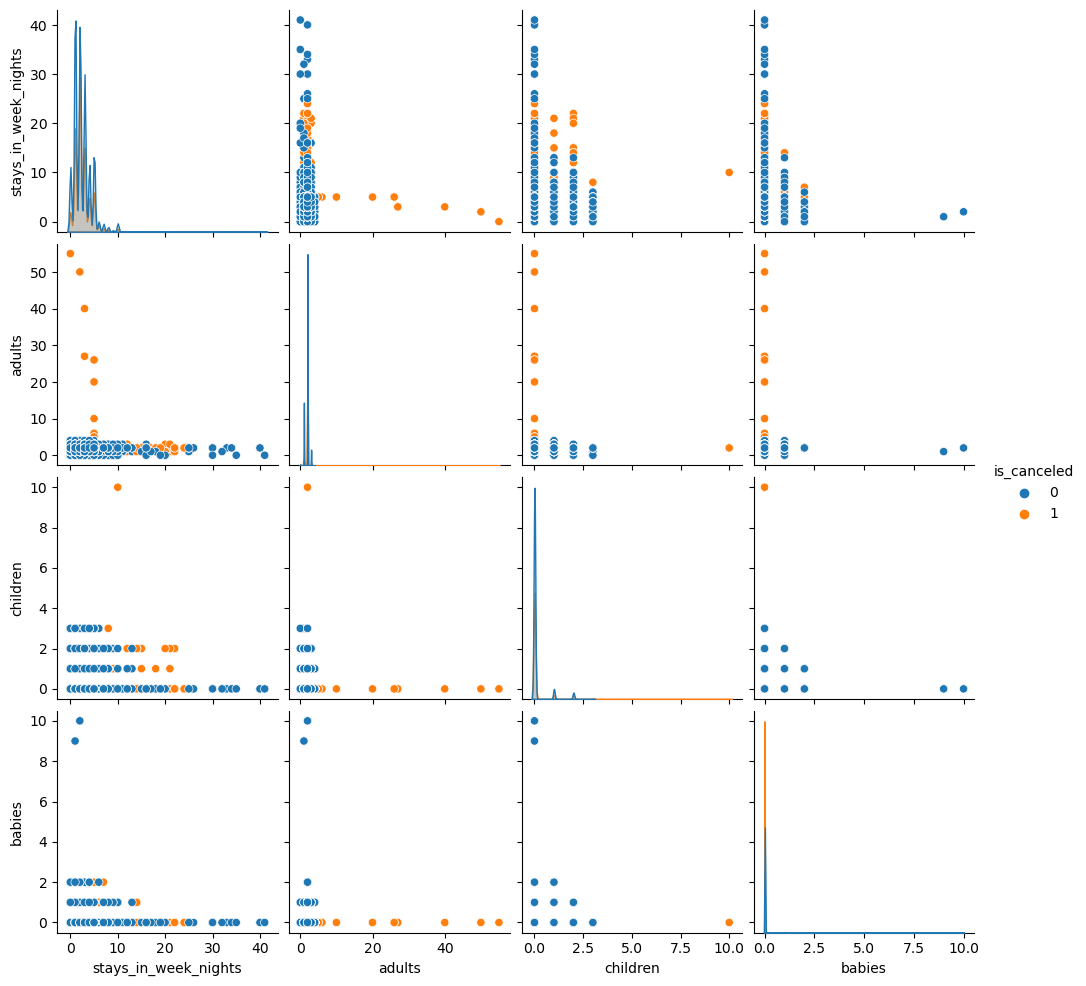

In [35]:
# Take a look at the distribution and correlations
plt.clf()
sns.pairplot(mine2,diag_kind = "kde", hue = 'is_canceled')
plt.show()

## Seems like all these variables have some outliers

In [32]:
# Take a look at the distribution and correlations
plt.clf()
sns.pairplot(mine2,diag_kind = "kde")
plt.show()

## Seems like all these variables have some outliers

,stays_in_week_nights,adults,children,babies
is_canceled,,,,
0,2.0,2.0,0.0,0.0
1,2.0,2.0,0.0,0.0


In [38]:
# Propose to replace all numerical values with logged version of these values

mine2[num] = np.log(mine2[num]+1)

/var/folders/g0/pb9rj9n56psgj5_0xvdld4940000gn/T/ipykernel_40149/3756461115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mine2[num] = np.log(mine2[num]+1)


In [39]:
mine2

,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,0.000000,1.098612,0.0,0.0,BB,PRT,Direct,Direct
1,0.000000,1.098612,0.0,0.0,BB,PRT,Direct,Direct
2,0.693147,0.693147,0.0,0.0,BB,GBR,Direct,Direct
3,0.693147,0.693147,0.0,0.0,BB,GBR,Corporate,Corporate
4,1.098612,1.098612,0.0,0.0,BB,GBR,Online TA,TA/TO
...,...,...,...,...,...,...,...,...
119385,1.791759,1.098612,0.0,0.0,BB,BEL,Offline TA/TO,TA/TO
119386,1.791759,1.386294,0.0,0.0,BB,FRA,Online TA,TA/TO
119387,1.791759,1.098612,0.0,0.0,BB,DEU,Online TA,TA/TO
119388,1.791759,1.098612,0.0,0.0,BB,GBR,Online TA,TA/TO


<Figure size 640x480 with 0 Axes>

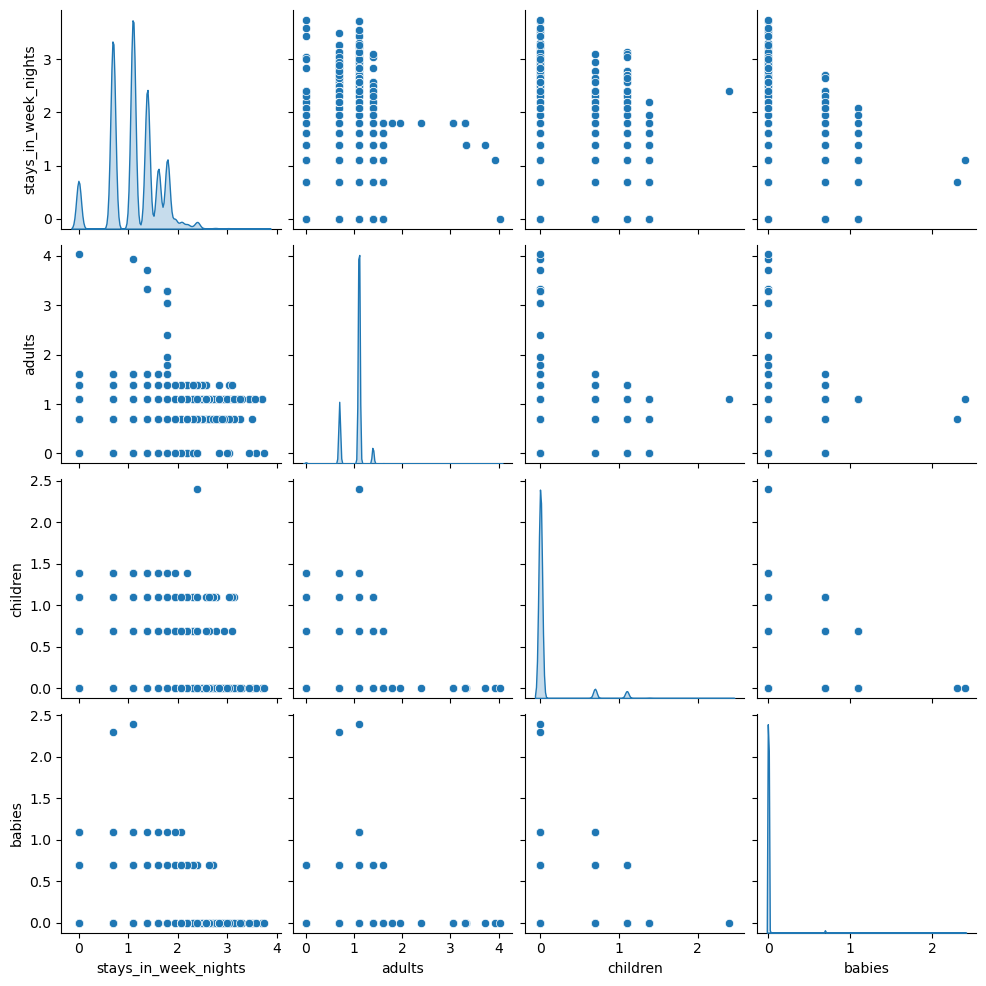

In [43]:
# Look at the histogram again after logging

plt.clf()
sns.pairplot(mine2,diag_kind = "kde")
plt.show()

## Seems like outlier and skew problems are mostly fixed

In [15]:
mine.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [16]:
pd.get_dummies(mine['meal'])

mine

,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,0,2,0.0,0,BB,PRT,Direct,Direct
1,0,2,0.0,0,BB,PRT,Direct,Direct
2,1,1,0.0,0,BB,GBR,Direct,Direct
3,1,1,0.0,0,BB,GBR,Corporate,Corporate
4,2,2,0.0,0,BB,GBR,Online TA,TA/TO
...,...,...,...,...,...,...,...,...
119385,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO
119386,5,3,0.0,0,BB,FRA,Online TA,TA/TO
119387,5,2,0.0,0,BB,DEU,Online TA,TA/TO
119388,5,2,0.0,0,BB,GBR,Online TA,TA/TO


In [17]:
## One-hot encode the categorical columns
mine2dum = pd.get_dummies(mine2[cat])
mine2dum.head(5)

,country_ABW,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [18]:
mine2[num]

,stays_in_week_nights,adults,children,babies
0,0.000000,1.098612,0.0,0.0
1,0.000000,1.098612,0.0,0.0
2,0.693147,0.693147,0.0,0.0
3,0.693147,0.693147,0.0,0.0
4,1.098612,1.098612,0.0,0.0
...,...,...,...,...
119385,1.791759,1.098612,0.0,0.0
119386,1.791759,1.386294,0.0,0.0
119387,1.791759,1.098612,0.0,0.0
119388,1.791759,1.098612,0.0,0.0


In [33]:
# Merge one-hot encoded cat cols with numerical cols
mine3 = mine2[num].join(mine2dum)
mine3

# Save as CSV file
mine3.to_csv("Var9to16.csv", index = False)

In [34]:
# Normalize the numeric data
mine2num = mine2[num]

mine2num_std = (mine2num-mine2num.mean())/mine2num.std()
mine3_std = mine2num_std.join(mine2dum)
mine3_std

# Save as CSV file
mine3_std.to_csv("Var9to16_Std.csv", index = False)

In [38]:
mine2

,is_canceled,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,0,0,2,0.0,0,BB,PRT,Direct,Direct
1,0,0,2,0.0,0,BB,PRT,Direct,Direct
2,0,1,1,0.0,0,BB,GBR,Direct,Direct
3,0,1,1,0.0,0,BB,GBR,Corporate,Corporate
4,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO
...,...,...,...,...,...,...,...,...,...
119385,0,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO
119386,0,5,3,0.0,0,BB,FRA,Online TA,TA/TO
119387,0,5,2,0.0,0,BB,DEU,Online TA,TA/TO
119388,0,5,2,0.0,0,BB,GBR,Online TA,TA/TO
